# Loading data
#### Importing .csv files

In [184]:
# ####################################################################################################################
# ################################                                             #######################################
# ################################     Loading data - Importing .csv files     #######################################
# ################################                                             #######################################
# ####################################################################################################################

import pandas as pd
from datetime import datetime
import matplotlib as plt
import numpy as np

# Loading the rating files:
df1 = pd.read_csv("ratings/1.csv")
df2 = pd.read_csv("ratings/2.csv")
df3 = pd.read_csv("ratings/3.csv")
df4 = pd.read_csv("ratings/4.csv")
df5 = pd.read_csv("ratings/5.csv")
df6 = pd.read_csv("ratings/6.csv")
df7 = pd.read_csv("ratings/7.csv")
df8 = pd.read_csv("ratings/8.csv")

# Loading the Platform files:
dfa = pd.read_csv("amazon_prime_titles.csv")
dfd = pd.read_csv("disney_plus_titles.csv")
dfh = pd.read_csv("hulu_titles.csv")
dfn = pd.read_csv("netflix_titles.csv")


# Data Transformation
#### 1. Generate ID field:
    Each record's ID should consist of the first letter of the platform name, followed by the show_id already present in the dataset (e.g., "as123" for Amazon titles).
#### 2. Fix Nulls:
    Replace null values in the "rating" field with the string "G" (which corresponds to a maturity rating of "general for all audiences").
#### 3. Normalize Dates:
    If present, dates should be in the format "YYYY-mm-dd".
#### 4. Normalize Case [camelCase]:
    All text fields should be in lower case, without exception.
#### 5. Transform the "duration" field:
    The "duration" field should be split into two fields: "duration_int", which should be an integer representing the duration, and "duration_type", which should be a string indicating the unit of measurement ("min" for minutes or "season" for TV seasons).

In [185]:
# ############################################################################
# ######################### 1. GENERATE ID FIELDS  ###########################
# ############################################################################


# Merging the rating files into one since they are related:
# Creating one main data frame: Data Frame Ratings [dfR]

dfR = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index = True)

# Creating a unique ID for the dataframes so, when I merge them, there are not going to be 'show_id' duplicates.
dfa = dfa.assign(id = 'a' + dfa['show_id'].astype(str))
dfd = dfd.assign(id = 'd' + dfd['show_id'].astype(str))
dfh = dfh.assign(id = 'h' + dfh['show_id'].astype(str))
dfn = dfn.assign(id = 'n' + dfn['show_id'].astype(str))

# Merging the Platform files into one since they are related:
# Creating one main data frame: Data Frame Platform [dfP]

dfP = pd.concat([dfa, dfd, dfh, dfn], ignore_index = True)

# Sending the 'id' column to be first
cols = dfP.columns.tolist()
cols = ['id'] + [col for col in cols if col != 'id']
dfP = dfP.reindex(columns=cols)

dfP.head(3)


,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,as1,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,as2,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,as3,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [186]:
# ############################################################################
# ############################## 2. FIX NULLS  ###############################
# ############################################################################

# I want to take a look at the unique values in dfP['rating']
#print(dfP['rating'].unique())       # After taking a look at 'rating' uniques values, i realized that there where values from 'duration'
                                    # I will copy the durations to the correct column


# Replace null values in 'duration' column with values from 'rating' column
dfP.loc[dfP['rating'].str.contains(' min', na=False), 'duration'] = dfP['rating']

# Replace remaining null values in 'duration' column with a string
dfP['duration'] = dfP['duration'].fillna('unknown')

# Replacing NULL values from 'rating' with 'G'
dfP['rating'] = dfP['rating'].fillna('G')

# Replace the 'duration' values in the 'rating' column with a string
dfP.loc[dfP['rating'].str.contains(' min', na=False), 'rating'] = 'Unknown'

# print(dfP['rating'].unique())       # Now there are no values from 'duration' [for example: '136 min']
dfP.head(3)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,as1,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,G,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,as2,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,as3,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,G,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [187]:
# ############################################################################
# ########################### 3. NORMALIZE DATES  ############################
# ############################################################################

# Some dates have white spaces therefore, they give error because they have another format.
# Stripping the white spaces from the dates:
dfP['date_added'] = dfP['date_added'].str.strip()

# Now that I don't have white spaces, I can change the format.
dfP['date_added'] = pd.to_datetime(dfP['date_added'], format='%B %d, %Y').dt.strftime('%Y-%m-%d')

dfP.head(3)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,as1,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,G,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,as2,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,as3,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,G,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [188]:
# ############################################################################
# ######################### 4. NORMALIZE lowercase  ##########################
# ############################################################################

dfP['type'] = dfP['type'].str.lower()
dfP['title'] = dfP['title'].str.lower()
dfP['director'] = dfP['director'].str.lower()
dfP['cast'] = dfP['cast'].str.lower()
dfP['country'] = dfP['country'].str.lower()
dfP['duration'] = dfP['duration'].str.lower()
dfP['listed_in'] = dfP['listed_in'].str.lower()
dfP['description'] = dfP['description'].str.lower()

dfP.head(3)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,G,113 min,"comedy, drama",a small fishing village must procure a local d...
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,G,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...


In [189]:
# ############################################################################
# ################### 5. TRANSFORM THE 'DURATION' FIELD  #####################
# ############################################################################

# Stripping the white spaces from the duration:
dfP['duration'] = dfP['duration'].str.strip()

# Analyzing the content of the field duration:
dfP['duration'].unique()

# Creating two new columns
dfP['duration_int'] = dfP['duration']
dfP['duration_type'] = dfP['duration']


# Setting the 'duration_type' column
dfP.loc[dfP['duration_type'].str.contains('min', na = False), 'duration_type'] = 'min'
dfP.loc[dfP['duration_type'].str.contains('season', na = False), 'duration_type'] = 'season'

# Setting the 'duration_int' column
dfP['duration_int'] = dfP['duration_int'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
dfP['duration_int'] = dfP['duration_int'].str.strip()

# Setting the 'duration_int' type as integer
dfP['duration_int'] = dfP['duration_int'].fillna('').replace('', 0)
dfP['duration_int'] = dfP['duration_int'].astype(int)

# Replacing nulls with 'unknown' in the cast column
dfP['cast'].fillna('unknown', inplace=True)


dfP.head(3)
# dfP.info()


,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,G,113 min,"comedy, drama",a small fishing village must procure a local d...,113,min
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,110,min
2,as3,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,G,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min


In [190]:
# ############################################################################
# #################### 6. TRANSFORMATIONS - BONUS TRACK ######################
# ############################################################################

# Drop show_id column because now we have id column
dfP.drop(columns = 'show_id', inplace = True)

# Drop duration column because we splitted that one in two
dfP.drop(columns = 'duration', inplace = True)

# Replacing some unknown values with 'not rated'.
dfP['rating'].replace({'UNRATED': 'not rated', 'NOT_RATE': 'not rated', 'NOT RATED': 'not rated', 'Unknown': 'not rated', 'UR': 'not rated', 'NR': 'not rated'}, inplace=True)
mask = dfP['rating'].str.contains('eason')
dfP.loc[mask, 'rating'] = 'not rated'

# Replacing some known repeated values with one unified value.
dfP['rating'].replace({'13+': 'PG-13', 'ALL': 'g', 'ALL_AGES': 'g', 'AGES_18_': 'NC-18', '18+': 'NC-18', '16+': 'NC-16', 'AGES_16_': 'NC-16', '16': 'NC-16', '7+': 'TV-Y7', 'TV-Y7-FV': 'TV-Y7'}, inplace=True)

# NORMALIZE lowercase
dfP['rating'] = dfP['rating'].str.lower()


# Setting missing values to "unknown"
dfP['director'] = dfP['director'].fillna("unknown")
dfP['country'] = dfP['country'].fillna("unknown")
dfP['date_added'] = dfP['date_added'].fillna("unknown")


# Change the name of rating to score
dfR = dfR.rename(columns={'rating': 'score'})

# I will GROUP BY 'movieId' and i'll take the mean from the ratings
dfR_gouped = dfR.groupby('movieId', as_index = False)   # Grouping while maintaining the original index
score = dfR_gouped.score.mean().round(1)               # Taking the mean of the grouped df and rounding it with one decimal

# Changing the name of "movieId" to 'id' so, it matches with the other dataFrame.
score = score.rename(columns = {'movieId' : 'id'})

# Merging the dfP [Platform] and dfR [Ratings] dataFrames with their id.
df_score = pd.merge(dfP, score, on = 'id', how = 'outer')

df_score.head(3)



,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.5
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,pg-13,"drama, international",a metro family decides to fight a cyber crimin...,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,3.5


In [191]:
# ############################################################################
# ########################## 7. EXPORTING AS .CSV ############################
# ############################################################################

df_score.to_csv('data.csv', index = False)

# Development API:
## I proposed to make the company's data available using the FastAPI framework, generating different endpoints that will be consumed in the API.

#### Create 6 functions (remember that each one must have a decorator for each one (@app.get('/'))):

1. Movie (only movie, not series, or documentaries, etc.) with the longest duration by year, platform, and duration type. The function must be called get_max_duration(year, platform, duration_type) and must return only the string of the movie name.

2. Number of movies (only movies, not series or documentaries, etc.) by platform, with a score higher than XX in a certain year. The function must be called get_score_count(platform, scored, year) and must return an int, with the total number of movies that meet the requested criteria.

3. Number of movies (only movies, not series or documentaries, etc.) by platform. The function must be called get_count_platform(platform) and must return an int, with the total number of movies on that platform. The platforms must be named Amazon, Netflix, Hulu, Disney.

4. Actor that appears the most by platform and year. The function must be called get_actor(platform, year) and must return only the string with the name of the actor that appears the most by the given platform and year.

5. The quantity of content/products (everything available on streaming) that was published by country and year. The function must be called prod_per_county(type, country, year) and should return the type of content (movie, series, documentary) by country and year in a dictionary with the variables named 'country' (name of the country), 'year' (year), 'movie' (type of content).

6. The total quantity of content/products (everything available on streaming, series, documentaries, movies, etc.) according to the given audience rating (for which audience was the movie classified). The function must be called get_contents(rating) and must return the total number of content with that audience rating.

In [192]:
# ####################################################################################################################
# ######################################                                 #############################################
# ######################################         Development API         #############################################
# ######################################                                 #############################################
# ####################################################################################################################

# Loading the file:
df = pd.read_csv("data.csv")

# Importing FASTAPI
from fastapi import FastAPI

# Creating a FastAPI instance
app = FastAPI()

df.head(3)


,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.5
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,pg-13,"drama, international",a metro family decides to fight a cyber crimin...,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,3.5


In [193]:
# ############################################################################
# ########################## 1. get_max_duration  ############################
# ############################################################################

# The function must be called get_max_duration(year, platform, duration_type) and must return only the string of the movie name.

# @app.get("/get_max_duration/{year}/{platform}/{duration_type}")
def get_max_duration(year: int, platform: str, duration_type: str):
    # Setting variables to lowercase
    platform = platform.lower()
    duration_type = duration_type.lower()

    # Setting the year variable type to int
    year = int(year)

    # This is an if statement for the user input variable [platform] transformation and for catching some potential errors.
    if platform in ['amazon prime', 'amazon', 'a']:
        p = 'a'
    elif platform in ['netflix', 'n']:
        p = 'n'
    elif platform in ['disney plus', 'disney', 'd']:
        p = 'd'
    elif platform in ['hulu', 'h']:
        p = 'h'
    else:
        somethingIsWrong = "Please enter correct values"
        return somethingIsWrong

    # This is an if statement for the user input variable [duration_type] transformation and for catching some potential errors.
    if duration_type in ['minutes', 'm', 'min']:
        d = 'min'
    elif duration_type in ['seasons', 'season', 's']:
        somethingIsWrong = "There are no movies with seasons"
        return somethingIsWrong
    else:
        somethingIsWrong = "Please enter correct values"
        return somethingIsWrong
    
    # This is an if statement for the user input variable [year] transformation and for catching some potential errors.
    if year < 1000:
        somethingIsWrong = "That year is too low"
        return somethingIsWrong
    elif year > 2030:
        somethingIsWrong = "Are you from the future? That year is too high"
        return somethingIsWrong
    else:
        y = year
     

    # Creating a filter for the different platforms that the user might set as an input.
    maskPlatform = df[df['id'].str.contains(p, na = False)].copy()

    # Creating a filter for the different duration types that the user might set as an input.
    mask_P_D= maskPlatform[maskPlatform['duration_type'].str.contains(d, na = False)]

    # Creating a filter for the different year that the user might set as an input.
    mask= mask_P_D[mask_P_D['release_year'] == y]


    # Looking for the MAX value in the filtered dataFrames.
    maxValue = mask['duration_int'].max(skipna = True)
    
    # Looking for the ROW with the MAX value in the filtered dataFrames.
    mask = mask.loc[mask['duration_int'] == maxValue].head(1)

    # Looking for the title of the movie in the filtered data.
    movieName = mask['title'].to_string(index = False)

    # Returning the title of the movie.
    return {"movieName": movieName}


test = get_max_duration(2014, 'amazon', 'min')
print(test)


{'movieName': 'midnight thunderstorm for sleep 9 hours'}


In [194]:
# ############################################################################
# ########################## 2. get_score_count  #############################
# ############################################################################

# 2. Number of movies (only movies, not series or documentaries, etc.) by platform, with a score higher than XX in a certain year.
# The function must be called get_score_count(platform, scored, year) and must return an int, with the total number of movies that meet the requested criteria.

# @app.get("/get_score_count/{platform}/{scored}/{year}")
def get_score_count(platform: str, scored: float, year: int):

    # Error proof for user input - platform
    platform = platform.lower()
    if platform in ['amazon prime', 'amazon', 'a']:
        p = 'a'
    elif platform in ['netflix', 'n']:
        p = 'n'
    elif platform in ['disney plus', 'disney', 'd']:
        p = 'd'
    elif platform in ['hulu', 'h']:
        p = 'h'
    else:
        somethingIsWrong = "Please enter correct values"
        return somethingIsWrong

    # Error proof for user input - scored
    # Setting the scored variable type to float
    scored = float(scored)
    if scored < 0.0:
        somethingIsWrong = "The score provided is too low"
        return somethingIsWrong
    elif scored > 5.01:
        somethingIsWrong = "The score provided is too high"
        return somethingIsWrong
    else:
        s = scored

    # Error proof for user input - year
    # Setting the year variable type to int
    year = int(year)

    if year < 1000:
        somethingIsWrong = "The year provided is too low"
        return somethingIsWrong
    elif year > 2030:
        somethingIsWrong = "Are you from the future? The year provided is too high"
        return somethingIsWrong
    else:
        y = year



    # Filter by type - only movies
    mask = df[df['type'].str.contains('movie', na = False)].copy()

    # Filter by platform
    mask_platform = mask[mask['id'].str.contains(p, na = False)]

    # Filter by scored
    mask_score_platform = mask_platform[mask_platform['score'] >= s]


    # Filter by year
    mask_score_platform_year = mask_score_platform[mask_score_platform['release_year'] == y]

    # Making a COUNT() for the movies that meet all the criteria above
    get_score_count = mask_score_platform_year.title.count()
    get_score_count = int(get_score_count)

    mask_score_platform_year.head(3)

    return {
    "platform" : platform,
    "quantity" : get_score_count,
    "year" : year,
    "score" : scored
    }

get_score_count('amaZon', 3.6, 2014)


{'platform': 'amazon', 'quantity': 101, 'year': 2014, 'score': 3.6}

In [195]:
# ############################################################################
# ######################### 3. get_count_platform  ###########################
# ############################################################################

# 3. Number of movies (only movies, not series or documentaries, etc.) by platform.
# The function must be called get_count_platform(platform) and must return an int, with the total number of movies on that platform.
# The platforms must be named Amazon, Netflix, Hulu, Disney.

# @app.get("/get_count_platform/{platform}")
def get_count_platform(platform: str):
    
    # This is an if statement for the user input variable [platform] transformation and for catching some potential errors.
    platform = platform.lower()
    if platform in ['a', 'az', 'amazon', 'amazon prime']:
        plt = 'a'
    elif platform in ['n', 'netflix']:
        plt = 'n'
    elif platform in ['h', 'hulu']:
        plt = 'h'
    elif platform in ['d', 'disney', 'disney plus']:
        plt = 'd'
    else:
        somethingIsWrong = "Please enter correct values"
        return somethingIsWrong

    # Creating a filter for the different platforms that the user might set as an input.
    mask_plt_3 = df[df['id'].str.contains(plt, na = False)].copy()

    mask_movie_3 = mask_plt_3[mask_plt_3['type'].str.contains('movie', na = False)]

    # Making a count for the different titles of movies
    num_movies = mask_movie_3['title'].count()
    num_movies = int(num_movies)

    
    return {
        "platform" : platform,
        "movies" : num_movies
        }
    
get_count_platform('az')




{'platform': 'az', 'movies': 7814}

In [196]:
# ############################################################################
# ############################# 4. get_actor  ################################
# ############################################################################

# 4. Actor that appears the most by platform and year. The function must be called get_actor(platform, year)
# and must return only the string with the name of the actor that appears the most by the given platform and year.


# @app.get("/get_count_platform/{platform}/{year}")
def get_actor(platform: str, year: int):
    
    # This is an if statement for the user input variable [platform] transformation and for catching some potential errors.
    platform = platform.lower()
    if platform in ['a', 'az', 'amazon', 'amazon prime']:
        plt = 'a'
    elif platform in ['n', 'netflix']:
        plt = 'n'
    elif platform in ['h', 'hulu']:
        plt = 'h'
    elif platform in ['d', 'disney', 'disney plus']:
        plt = 'd'
    else:
        somethingIsWrong = "Please enter correct values"
        return somethingIsWrong
    
    # This is an if statement for the user input variable [year] transformation and for catching some potential errors.
    if year < 1000:
        somethingIsWrong = "That year is too low"
        return somethingIsWrong
    elif year > 2030:
        somethingIsWrong = "Are you from the future? That year is too high"
        return somethingIsWrong
    else:
        y = year
    
    # Creating a filter for the different platforms that the user might set as an input.
    mask_plt_4 = df[df['id'].str.contains(plt, na = False)].copy()

    # Creating a filter for the different year that the user might set as an input.
    mask_year_4 = mask_plt_4[mask_plt_4['release_year'] == y]
    cast = mask_year_4['cast']

    # create a dictionary to count the frequency of each word
    word_counts = {}

    # iterate through the rows
    for row in cast:
        # iterate through the comma-separated elements in each row
        row = row.split(',')
        row = [word.strip() for word in row]

    # Count the number of occurrences of each word
        for word in row:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

    # sorting the dictionary "word_counts"
    sorted_dict = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Taking the second value because the first value is "unknown" [they were nulls]
    actorName = sorted_dict[1][0] # Name of actor
    frequency = sorted_dict[1][1] # Number of times the actor appears


    return {
    "platform" : platform,
    "year" : year,
    "actor" : actorName,
    "frequency" : frequency}


get_actor('amazon', 2014)

{'platform': 'amazon',
 'year': 2014,
 'actor': 'anne-marie newland',
 'frequency': 5}

In [197]:

# ############################################################################
# ########################## 5. prod_per_country  #############################
# ############################################################################

# 5. The quantity of content/products (everything available on streaming) that was published by country and year.
# The function must be called prod_per_country(type, country, year) and should return the type of content (movie, series, documentary)
# by country and year in a dictionary with the variables named 'country' (name of the country), 'year' (year), 'movie' (type of content).

# @app.get("/prod_per_country/{types}/{country}/{year}")
def prod_per_country(types: str, country: str, year: int):

    # Error proof for user input - country
    c = country.lower()


    # Error proof for user input - type
    types = types.lower()

    if types in ['movie', 'movies', 'mov', 'm', 'pelicula', 'peli']:
        t = 'movie'
    elif types in ['tv show', 'tvshow', 'show', 'tv', 'series', 'season', 's']:
        t = 'tv show'
    else:
        somethingIsWrong = "Oops! The type provided is not right"
        return somethingIsWrong


    # Error proof for user input - year
    # Setting the year variable type to int
    year = int(year)

    if year < 1000:
        somethingIsWrong = "The year provided is too low"
        return somethingIsWrong
    elif year > 2030:
        somethingIsWrong = "Are you from the future? The year provided is too high"
        return somethingIsWrong
    else:
        y = year

    # Filtering by the user input - country
    mask_country = dfP[dfP['country'].str.contains(c, na = False)].copy()

    # Filtering by the user input - type
    mask_country_type = mask_country[mask_country['type'].str.contains(t, na = False)]

    # Filtering by the user input - type
    mask_country_type_year = mask_country_type[mask_country_type['release_year'] == y]


    prod_per_country = mask_country_type_year[['type', 'country', 'release_year']].reset_index(drop=True)
    count_type = prod_per_country.type.count()


    print(prod_per_country.head())
    return {
        "country" : prod_per_country.country[0],
        "year" : year,
        "movies" : count_type}

prod_per_country('movie', 'indi', 2021)

    type country  release_year
0  movie   india          2021
1  movie   india          2021
2  movie   india          2021
3  movie   india          2021
4  movie   india          2021


{'country': 'india', 'year': 2021, 'movies': 49}

In [198]:
# ############################################################################
# ########################### 6. get_contents  ###############################
# ############################################################################

# 6. The total quantity of content/products (everything available on streaming, series, documentaries, movies, etc.)
# according to the given audience rating (for which audience was the movie classified).
# The function must be called get_contents(rating) and must return the total number of content with that audience rating.

# @app.get("/prod_per_country/{rating}")
def get_contents(rating: str):

    # Creating a filter for the different RATING that the user might set as an input.
    mask_rating = dfP[dfP['rating'].str.contains(rating, na = False)].copy()

    # Making a count for the different titles of movies
    num_content = mask_rating['title'].count()
    get_contents = int(num_content)

    return {
    "rating" : rating,
    "contents" : get_contents}

get_contents('g')


{'rating': 'g', 'contents': 9069}

# Exploratory Data Analysis [EDA]

### The data is already clean. Now, I am going to investigate the relationships between the variables of the datasets, see if there are any outliers or anomalies (which do not necessarily have to be errors), and look for any interesting patterns that are worth exploring in a further analysis. The internet recommends libraries such as Pandas Profiling, Sweetviz, Autoviz, among others.

In [199]:
# ####################################################################################################################
# ################################                                            ########################################
# ################################       EXPLORATORY DATA ANALYSIS [EDA]      ########################################
# ################################                                            ########################################
# ####################################################################################################################
from IPython.display import Image

# Loading the file:
df = pd.read_csv("data.csv")
df.head()

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.5
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,pg-13,"drama, international",a metro family decides to fight a cyber crimin...,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,3.5
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69,min,3.5
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45,min,3.5


In [200]:
# I created a .html report using the library below. It was super useful

# %pip install pandas_profiling
# import pandas_profiling as pp


# report = pp.ProfileReport(df)
# report.to_file("my_report.html")

#### We confirmed visually that no values are missing from our data


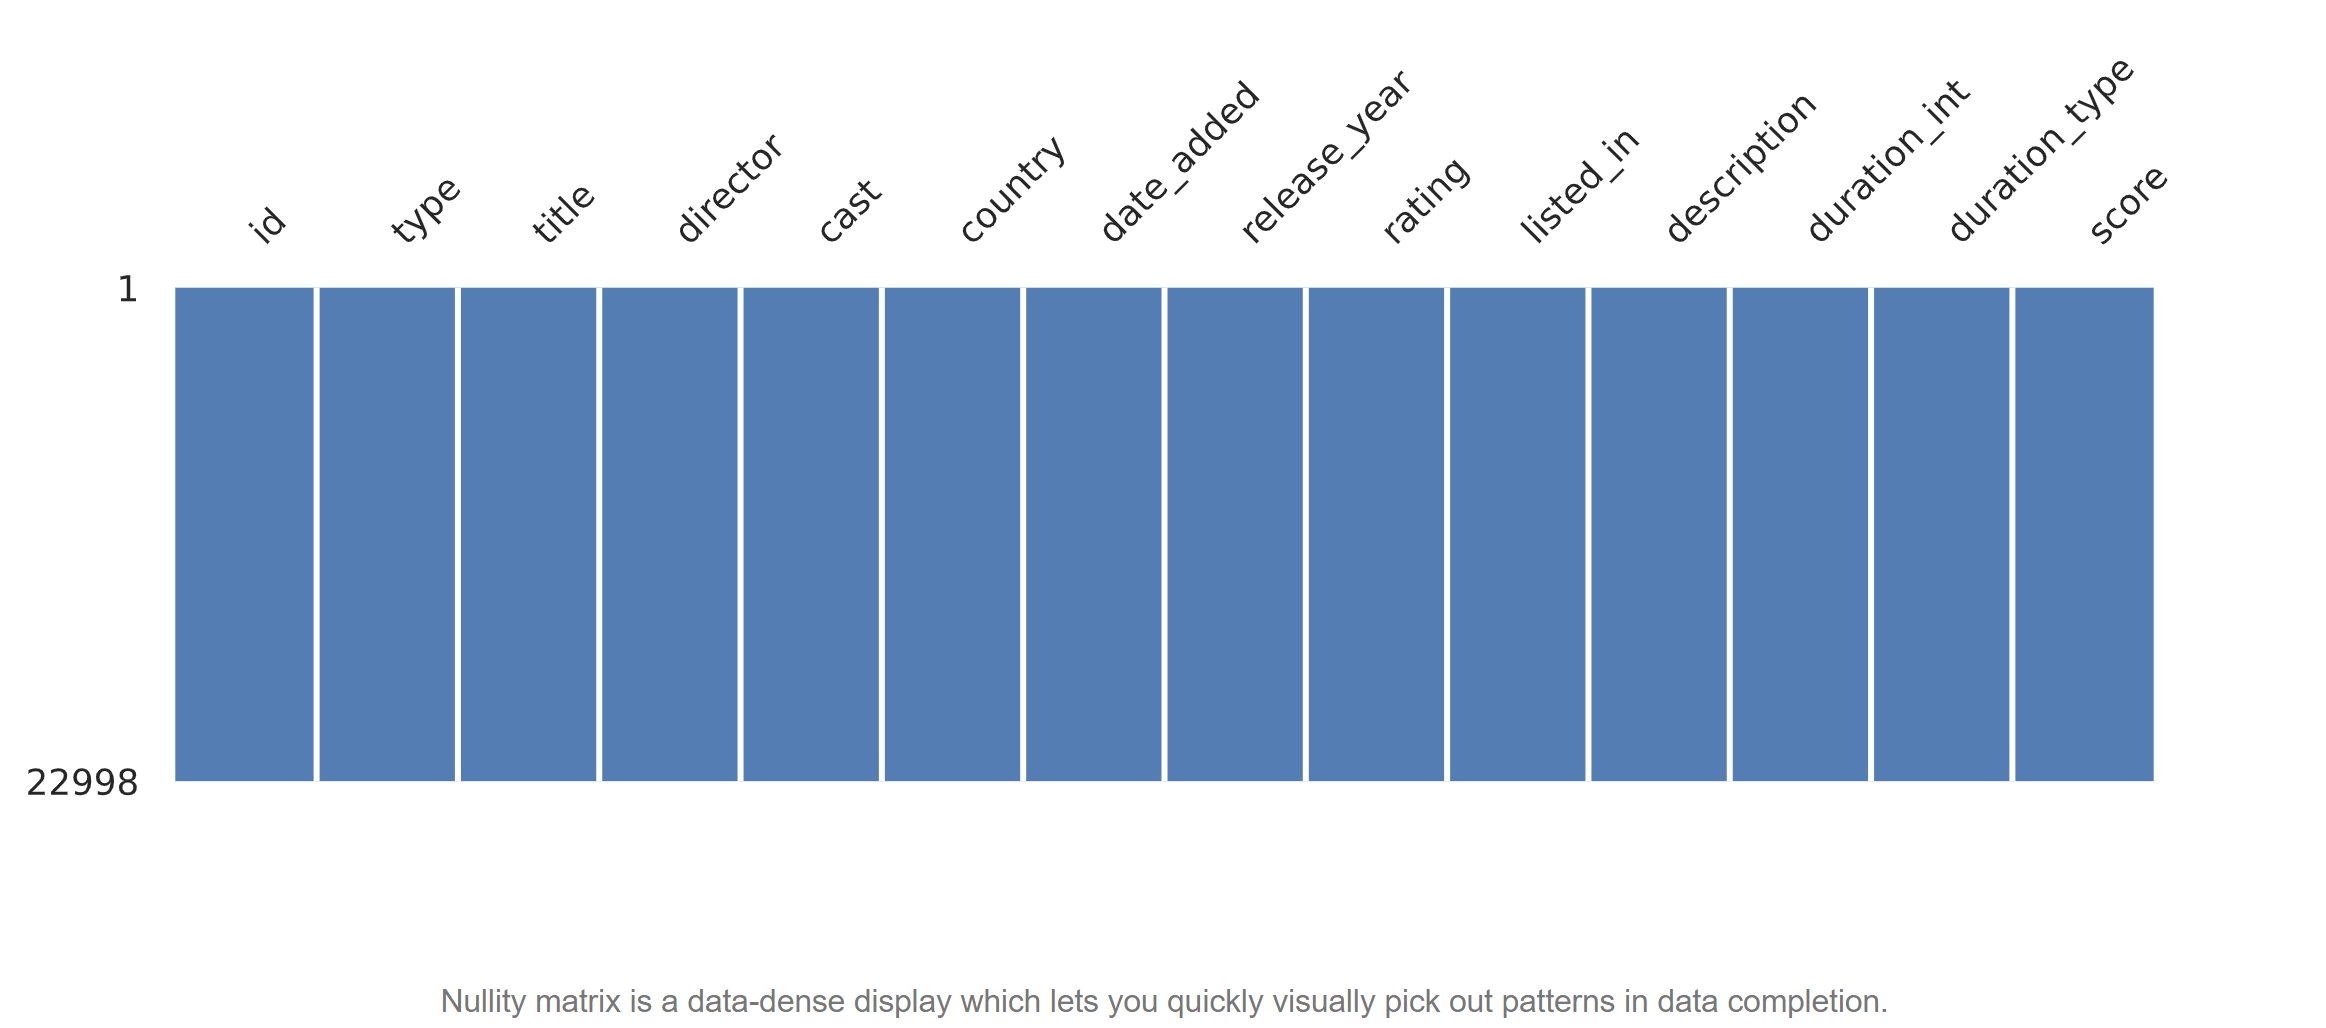

In [201]:
Image(filename='src/img/noNulls.png')

#### We also noticed that there are no repeated ID's

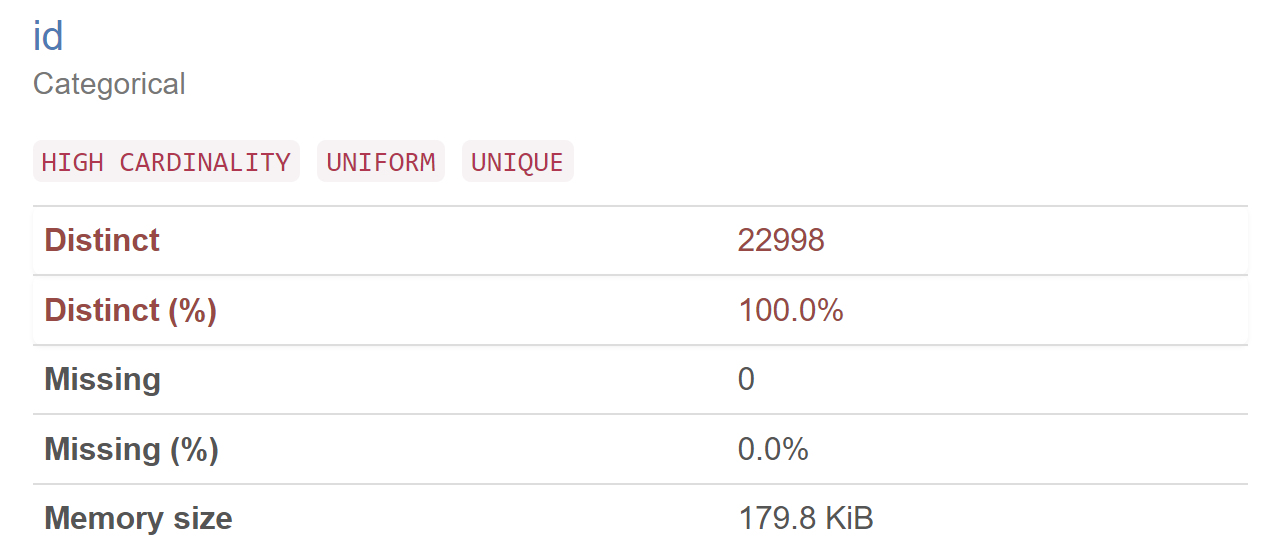

In [202]:
Image(filename='src/img/distinctIDs.png')

#### By analyzing the score we know what are the majority of ratings

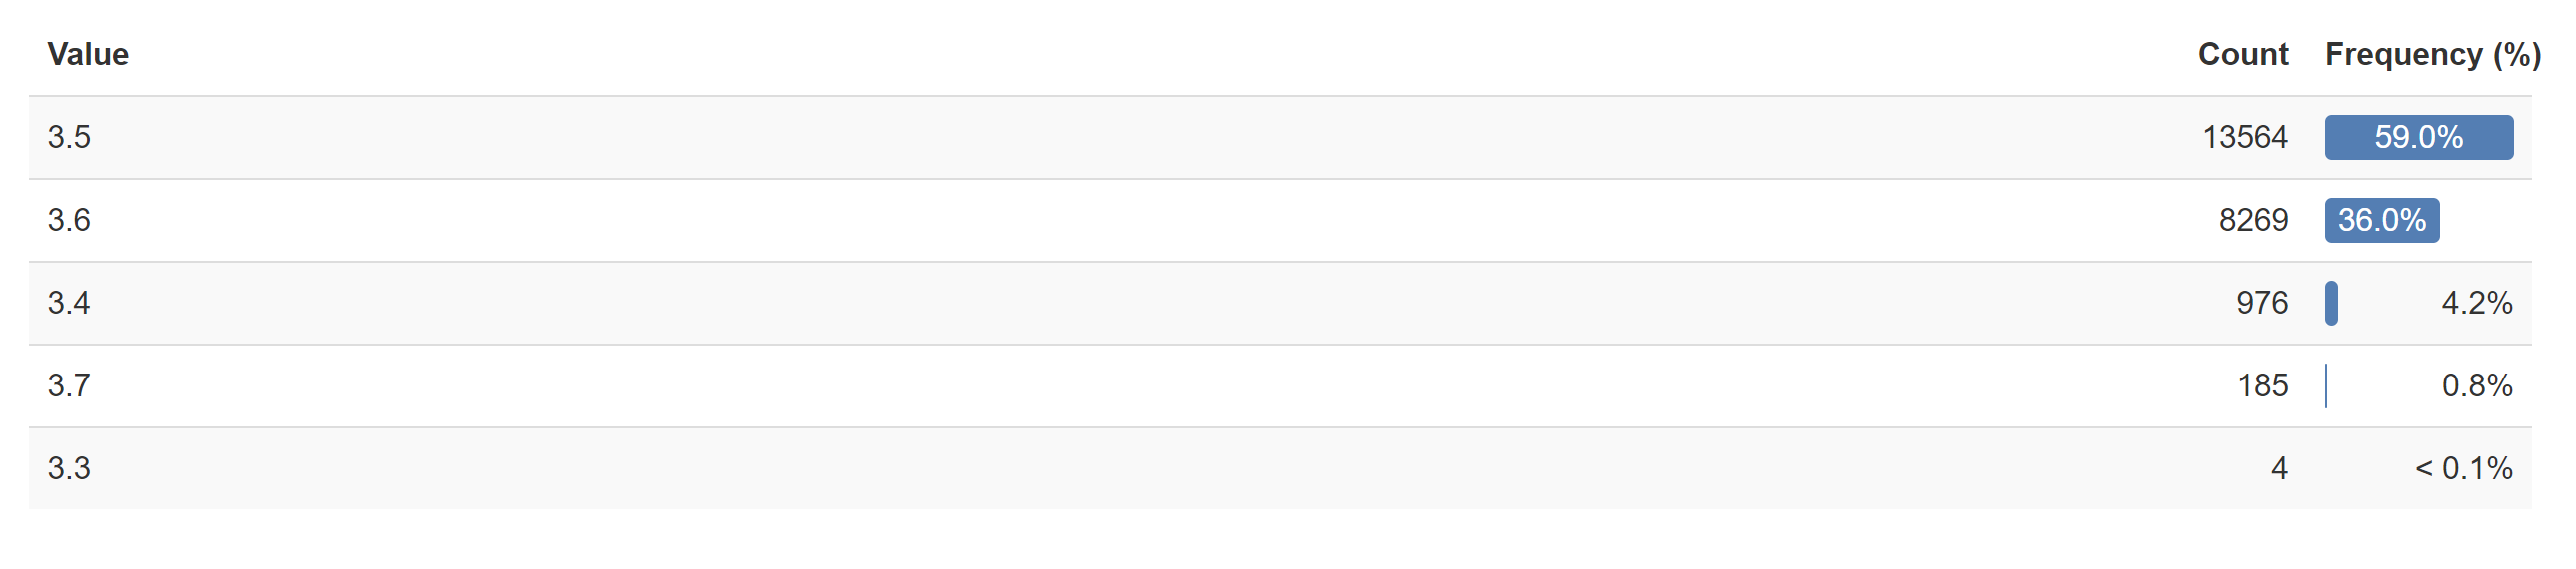

In [203]:
Image(filename='src/img/score.png')

#### Correlation Matrix
Talking about correlations, i'll attach a correlation matrix regarding the data.

A correlation table, also known as a correlation matrix, is a table that displays the pairwise correlations between different variables in a dataset. In other words, it shows how strongly one variable is related to another variable.

-1 indicating a perfect negative correlation, +1 indicating a perfect positive correlation, and 0 indicating no correlation.

A correlation table can be useful in data analysis because it can help identify patterns and relationships between variables. For example, if there is a high positive correlation between two variables, it suggests that changes in one variable are closely related to changes in the other variable. On the other hand, if there is a high negative correlation between two variables, it suggests that changes in one variable are inversely related to changes in the other variable.

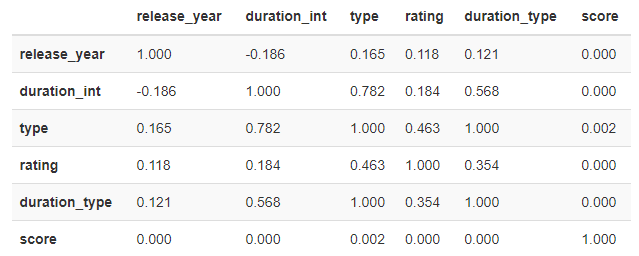

In [204]:
Image(filename='src/img/correlation.png')

We see that the following have a significant positive correlation:


*   duration_type - type [1.000]
*   type - duration_int [0.782]
*   duration_type - duration_int [0.568]
*   type - rating [0.463]
*   duration_type - rating [0.354]

We see that the following have some negative correlation:



*   duration_int - release_year [-0.186]

# Recommendation system with machine learning

#### This consists of recommending movies to the users based on similar movies, so the similarity score between that movie and the rest of the movies must be found. They will be ordered according to the score and a Python list with 5 values will be returned, each being the string of the name of the movies with the highest score, in descending order.

1. **Content-based filtering:**
For this recommendation system, the content of the movie (cast, description, director, genre) is used to find its similarity with other movies. Then, movies that are most likely to be similar are recommended.

2. **Recommendation based on plot description visualization:**
We will calculate similarity scores for all movies based on plot descriptions and recommend movies based on this similarity score. The plot description is provided in the "description" feature of our dataset.

In [205]:
df.head(3)

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.5
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,pg-13,"drama, international",a metro family decides to fight a cyber crimin...,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,3.5


In [206]:
#############################      1. Content-based filtering:      #############################
# For this recommendation system, the content of the movie (cast, description, director, genre)
# is used to find its similarity with other movies. Then, movies that are most likely to be similar are recommended.


# Importing the TF IDF Vectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Defining object of library
tfVect = TfidfVectorizer(stop_words = 'english')

# Just in case I forgot, filling in the nulls.
df.description = df.description.fillna('')

# Building the matrix required for the library
tf_matrix = tfVect.fit_transform(df.description)

# Checking the shape of the matrix.
print(f"{tf_matrix.shape} is the shape of matrix.")


(22998, 40017) is the shape of matrix.


#### Since I have used the TF IDF vectorizer, the calculation of the dot product will directly give us the cosine similarity score. Therefore, I will be using the linear_kernel() function from sklearn instead of the recommended cosine_similarities() function since it will be faster.

In [207]:
# Importing the linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cos_simi = linear_kernel(tf_matrix, tf_matrix)

# Building a map in order to identify the movie index and title.
indx = pd.Series(df.index, index = df.title).drop_duplicates()



In [208]:
# Creating a function that takes one movie as input and returns a list of 5 similar movies

def recommendations(title: str, cosine_sim = cos_simi):
    idx = indx[title]
    # Creating score for similar movies
    similarScores = list(enumerate(cosine_sim[idx]))

    # Sorting that score
    similarScores = sorted(similarScores, key = lambda x : x[1], reverse = True)

    # Taking the score of the first 5 movies
    similarScores = similarScores[1:6]

    # Finding the index from those movies
    movieIndex = [i[0] for i in similarScores]

    return df.title.iloc[movieIndex]

recommendations('xxx') # Vin Diesel action movie

# The recommendation is not that good. I am going to try it in another way.

17918    the confession tapes
6901             siddhi seere
12604               the flood
15939              60 days in
10995            the rescuers
Name: title, dtype: object

In [209]:
##################  2. Recommendation based on plot description visualization:  #################

# We will calculate similarity scores for all movies based on plot descriptions and recommend movies
# based on this similarity score. The plot description is provided in the "description" feature of our dataset.


# Simplifying the dataset
f = ['listed_in', 'director', 'cast', 'description', 'title']
df_filters = df[f].copy()

df_filters.head(3)

,listed_in,director,cast,description,title
0,"comedy, drama",don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",a small fishing village must procure a local d...,the grand seduction
1,"drama, international",girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",a metro family decides to fight a cyber crimin...,take care good night
2,"action, drama, suspense",josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",after a man discovers his wife is cheating on ...,secrets of deception


In [219]:
# I am going to create a "soup" with all the information to later analyze it.

def create_soup(info):
    return info['director'] + ' ' + info['cast'] + ' ' + info['listed_in'] + ' ' + info['description']

# Creating a column name 'soup' that will have all the info
df_filters['soup'] = df_filters.apply(create_soup, axis = 1)

df_filters.head(3)

,index,listed_in,director,cast,description,title,soup
0,0,"comedy, drama",don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",a small fishing village must procure a local d...,the grand seduction,"don mckellar brendan gleeson, taylor kitsch, g..."
1,1,"drama, international",girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",a metro family decides to fight a cyber crimin...,take care good night,"girish joshi mahesh manjrekar, abhay mahajan, ..."
2,2,"action, drama, suspense",josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",after a man discovers his wife is cheating on ...,secrets of deception,"josh webber tom sizemore, lorenzo lamas, rober..."


In [211]:
# Similar steps from the last recommendation engine, but slightly different

# Importing useful libraries
from sklearn.feature_extraction.text import CountVectorizer

# Creating the matrix
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df_filters.soup)

print(f"{count_matrix.shape} is the shape of matrix.")

(22998, 80107) is the shape of matrix.


In [220]:
# Compute the similarities
# IMport libraries

from sklearn.metrics.pairwise import cosine_similarity

accurate_cosine_sim = cosine_similarity(count_matrix, count_matrix)

df_filters.head(3)

,index,listed_in,director,cast,description,title,soup
0,0,"comedy, drama",don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",a small fishing village must procure a local d...,the grand seduction,"don mckellar brendan gleeson, taylor kitsch, g..."
1,1,"drama, international",girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",a metro family decides to fight a cyber crimin...,take care good night,"girish joshi mahesh manjrekar, abhay mahajan, ..."
2,2,"action, drama, suspense",josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",after a man discovers his wife is cheating on ...,secrets of deception,"josh webber tom sizemore, lorenzo lamas, rober..."


In [213]:
# Reset the index for future
df_filters = df_filters.reset_index()
indx = pd.Series(df_filters.index, index = df_filters.title)

# Creating new recommendation function
def get_recommendations(title: str, cosine_sim = accurate_cosine_sim):
    idx = indx[title]
    # Creating score for similar movies
    similarScores = list(enumerate(cosine_sim[idx]))

    # Sorting that score
    similarScores = sorted(similarScores, key = lambda x : x[1], reverse = True)

    # Taking the score of the first 5 movies
    similarScores = similarScores[1:6]

    # Finding the index from those movies
    movieIndex = [i[0] for i in similarScores]

    return df.title.iloc[movieIndex]

# get_recommendations('xxx') # Vin Diesel action movie

22958            xxx: state of the union
3169              bad asses on the bayou
14992    never back down 2: the beatdown
17292                               mfkz
3170                bad ass 2: bad asses
Name: title, dtype: object

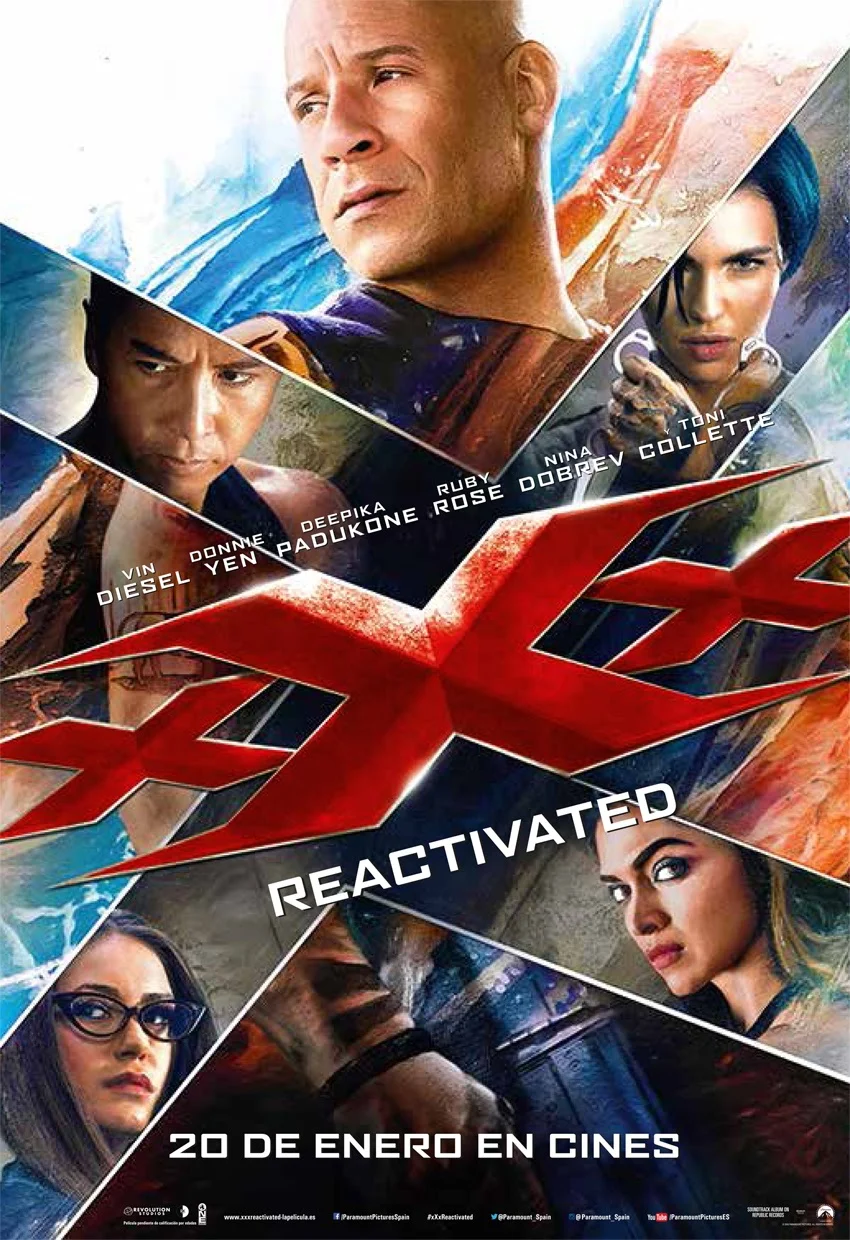

In [216]:
# I am going to call for this movie:
# xxx, an action movie that Vin Diesel appears

Image(filename='src/img/vinDieselx.png')

In [214]:
# Testing old recommendation engine
recommendations('xxx') # Vin Diesel action movie

17918    the confession tapes
6901             siddhi seere
12604               the flood
15939              60 days in
10995            the rescuers
Name: title, dtype: object

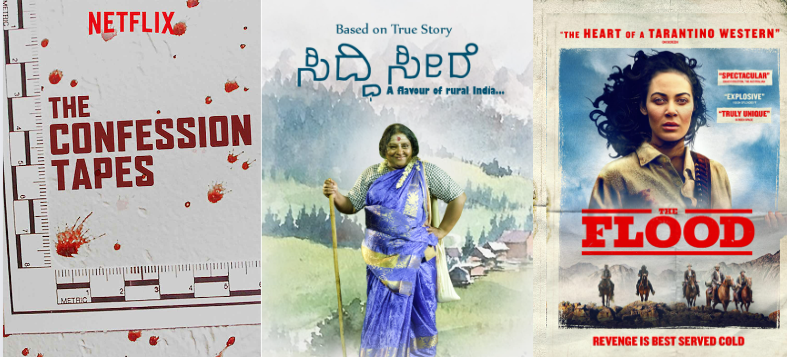

In [217]:
Image(filename='src/img/recommendation.png')

In [215]:
# Testing new recommendation engine
get_recommendations('xxx') # Vin Diesel action movie


22958            xxx: state of the union
3169              bad asses on the bayou
14992    never back down 2: the beatdown
17292                               mfkz
3170                bad ass 2: bad asses
Name: title, dtype: object

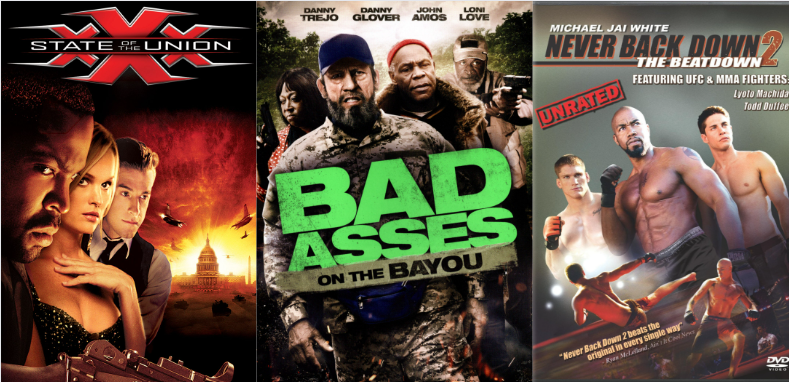

In [218]:
Image(filename='src/img/get_recommendation.png')